1. Explain the Concept of Batch Normalization in the Context of Artificial Neural Networks
Batch normalization is a technique introduced to improve the training of artificial neural networks by normalizing the inputs to each layer within a mini-batch. It was designed to address the issue of internal covariate shift, where the distribution of activations changes during training as the weights update. This shift can slow down training or make it harder for the network to converge.

By applying batch normalization, each mini-batch’s input is normalized so that it has a mean of 0 and a standard deviation of 1. This normalization reduces fluctuations in the input distributions across the layers, leading to more stable training and often allowing the use of higher learning rates, which accelerates convergence.

2. Describe the Benefits of Using Batch Normalization During Training
The key benefits of using batch normalization during training are:

Faster Training:

Batch normalization reduces the internal covariate shift, which allows the model to converge more quickly. Networks with batch normalization typically require fewer epochs to reach a good solution, making the training process faster and more efficient.
Improved Stability:

By keeping the inputs to each layer stable and normalized, batch normalization helps prevent issues caused by exploding or vanishing gradients, which are common in deep networks. This contributes to more stable gradients during backpropagation.
Allows for Higher Learning Rates:

Since batch normalization mitigates the risk of large gradients, higher learning rates can be used without risking instability or divergence in the training process. Higher learning rates can further accelerate convergence.
Regularization Effect:

Batch normalization has a regularizing effect, as the noise introduced by mini-batch statistics helps prevent overfitting. This regularization effect can sometimes reduce the need for other forms of regularization, like dropout.
Improved Generalization:

Networks with batch normalization tend to generalize better on unseen data, leading to improved performance on test sets.

3. Discuss the Working Principle of Batch Normalization, Including the Normalization Step and the Learnable Parameters

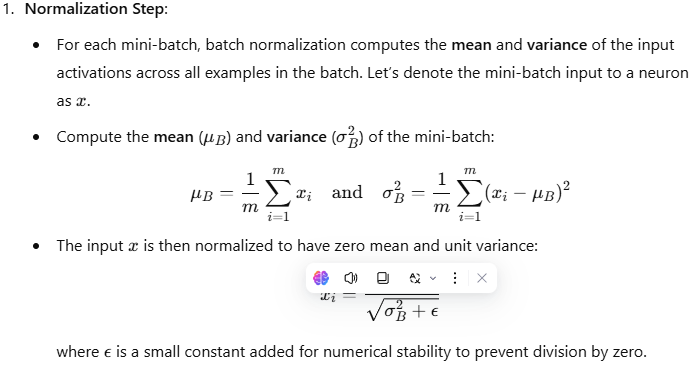

Scaling and Shifting (Learnable Parameters):

To give the network the flexibility to learn an optimal distribution, two learnable parameters are introduced: a scaling parameter
𝛾
γ and a shifting parameter
𝛽
β.
These parameters allow the normalized inputs to be scaled and shifted, allowing the model to learn the optimal mean and variance. The final output of batch normalization is:
𝑦
𝑖
=
𝛾
𝑥
^
𝑖
+
𝛽
y
i
​
 =γ
x
^
  
i
​
 +β
The parameters
𝛾
γ and
𝛽
β are learned during training along with other network parameters, giving the model control over the normalized outputs.
Effect During Inference:

During inference, the mean and variance are computed over the entire training set rather than a mini-batch. This allows the network to maintain stable outputs regardless of the batch size, as the batch statistics can fluctuate across mini-batches.
Summary of Key Components:
Normalization: Each mini-batch’s input is normalized to zero mean and unit variance.
Learnable Parameters: The normalized output is then scaled and shifted by learnable parameters
𝛾
γ and
𝛽
β to allow the model to learn an optimal output distribution.
Inference Mode: During inference, the network uses a running average of the batch statistics (mean and variance) rather than recalculating them on each batch.
Batch normalization has become a standard technique in deep learning architectures, as it consistently improves training efficiency, stability, and generalization in neural networks.

Q2. Implementation
1. Choose a dataset of your choice (e.g., MNIST, CIFAR-10) and preprocess it.
2. Implement a simple feedforward neural network using any deep learning framework/library (e.g.,
TensorFlow, PyTorch)
3. Train the neural network on the chosen dataset without using batch normalizationr
4. Implement batch normalization layers in the neural network and train the model againr
5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and
without batch normalizationr
6. Discuss the impact of batch normalization on the training process and the performance of the neural
network.

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
transform =transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.8))
                               ])
#load MINST Dataset

train_data=datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_data=datasets.MNIST(root='./data',train=False,download=True,transform=transform)

#DataLoader for batch processing
train_loader=DataLoader(train_data,batch_size=64,shuffle=True)
test_loader=DataLoader(test_data,batch_size=64,shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.26MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 155kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.51MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [11]:
train_loader

##Define the Model Without Batch Normalization

In [3]:
class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN,self).__init__()
    self.fc1=nn.Linear(28*28,128)
    self.fc2=nn.Linear(128,64)
    self.fc3=nn.Linear(64,10)

  def forward(self,x):
    x=x.view(x.size(0),-1)
    x=torch.relu(self.fc1(x))
    x=torch.relu(self.fc2(x))
    x=self.fc3(x)
    return x

model=SimpleNN()
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)

In [4]:
def train_model(model,train_loader,criterion,optimizer,epochs=10):
  for epoch in range(epochs):
    running_loss=0.0
    for images,labels in train_loader:
      optimizer.zero_grad()
      outputs= model(images)
      loss=criterion(outputs,labels)
      loss.backward()
      optimizer.step()
      running_loss+=loss.item()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")




In [ ]:
train_model(model, train_loader, criterion, optimizer)

Define Model with Batch Normalization

In [5]:
class SimpleNNWithBatchNorm(nn.Module):
  def __init__(self):
    super(SimpleNNWithBatchNorm,self).__init__()
    self.fc1=nn.Linear(28*28,128)
    self.bn1=nn.BatchNorm1d(128)
    self.fc2=nn.Linear(128,64)
    self.bn2=nn.BatchNorm1d(64)
    self.fc3=nn.Linear(64,10)

  def forward(self,x):
    x=x.view(x.size(0),-1)
    x=torch.relu(self.fc1(x))
    x=torch.relu(self.fc2(x))
    x=self.fc3(x)
    return x

model_bn=SimpleNNWithBatchNorm()
optimizer_bn=optim.SGD(model_bn.parameters(),lr=0.01)

In [10]:
train_model(model_bn, train_loader, criterion, optimizer_bn)

Epoch [1/10], Loss: 1.4021
Epoch [2/10], Loss: 0.4786
Epoch [3/10], Loss: 0.3729
Epoch [4/10], Loss: 0.3346
Epoch [5/10], Loss: 0.3094
Epoch [6/10], Loss: 0.2901
Epoch [7/10], Loss: 0.2743
Epoch [8/10], Loss: 0.2599
Epoch [9/10], Loss: 0.2463
Epoch [10/10], Loss: 0.2333


##Evaluate and compare performance

In [6]:
def evaluate_model(model,test_loader):
  correct = 0
  total =0
  with torch.no_grad():
    for images,labels in test_loader:
      outputs=model(images)
      _,predicted=torch.max(outputs.data,1)
      total +=labels.size(0)
      correct +=(predicted==labels).sum().item()
  accuracy=100*correct/total
  return accuracy


##evaluate both models

In [12]:
accuracy_no_bn=evaluate_model(model,test_loader)
accuracy_bn=evaluate_model(model_bn,test_loader)

In [13]:
print(f"Accuracy without Batch Normalization: {accuracy_no_bn:.2f}%")
print(f"Accuracy with Batch Normalization: {accuracy_bn:.2f}%")

Accuracy without Batch Normalization: 10.84%
Accuracy with Batch Normalization: 93.45%


In [ ]:
##Q3 Analysis

Q3. Experimentation and Analysis
1. Experiment with different batch sizes and observe the effect on the training dynamics and model
performance.
2. Discuss the advantages and potential limitations of batch normalization in improving the training of
neural networks.

In [16]:
class SimpleNNWithBatchNorm(nn.Module):
  def __init__(self):
    super(SimpleNNWithBatchNorm,self).__init__()
    self.fc1=nn.Linear(28*28,128)
    self.bn1=nn.BatchNorm1d(128)
    self.fc2=nn.Linear(128,64)
    self.bn2=nn.BatchNorm1d(64)
    self.fc3=nn.Linear(64,10)

  def forward(self,x):
    x=x.view(x.size(0),-1)
    x=torch.relu(self.fc1(x))
    x=torch.relu(self.fc2(x))
    x=self.fc3(x)
    return x


def train_model(model,train_loader,criterion,optimizer,epochs=10):
  for epoch in range(epochs):
    running_loss=0.0
    for images,labels in train_loader:
      optimizer.zero_grad()
      outputs= model(images)
      loss=criterion(outputs,labels)
      loss.backward()
      optimizer.step()
      running_loss+=loss.item()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

def evaluate_model(model,test_loader):
  correct = 0
  total =0
  with torch.no_grad():
    for images,labels in test_loader:
      outputs=model(images)
      _,predicted=torch.max(outputs.data,1)
      total +=labels.size(0)
      correct +=(predicted==labels).sum().item()
  accuracy=100*correct/total
  return accuracy

In [15]:
## Experiment with different batch size


Training with batch size 16
Epoch [1/10], Loss: 0.3824
Epoch [2/10], Loss: 0.1735
Epoch [3/10], Loss: 0.1359
Epoch [4/10], Loss: 0.1159
Epoch [5/10], Loss: 0.1024
Epoch [6/10], Loss: 0.0912
Epoch [7/10], Loss: 0.0827
Epoch [8/10], Loss: 0.0786
Epoch [9/10], Loss: 0.0706
Epoch [10/10], Loss: 0.0652
Test Accuracy with batch size 16: 96.91%

Training with batch size 32
Epoch [1/10], Loss: 0.4363
Epoch [2/10], Loss: 0.1744
Epoch [3/10], Loss: 0.1296
Epoch [4/10], Loss: 0.1038
Epoch [5/10], Loss: 0.0883
Epoch [6/10], Loss: 0.0752
Epoch [7/10], Loss: 0.0652
Epoch [8/10], Loss: 0.0593
Epoch [9/10], Loss: 0.0562
Epoch [10/10], Loss: 0.0505
Test Accuracy with batch size 32: 96.91%

Training with batch size 64
Epoch [1/10], Loss: 0.5548
Epoch [2/10], Loss: 0.2135
Epoch [3/10], Loss: 0.1520
Epoch [4/10], Loss: 0.1187
Epoch [5/10], Loss: 0.0994
Epoch [6/10], Loss: 0.0840
Epoch [7/10], Loss: 0.0730
Epoch [8/10], Loss: 0.0643
Epoch [9/10], Loss: 0.0574
Epoch [10/10], Loss: 0.0508
Test Accuracy with

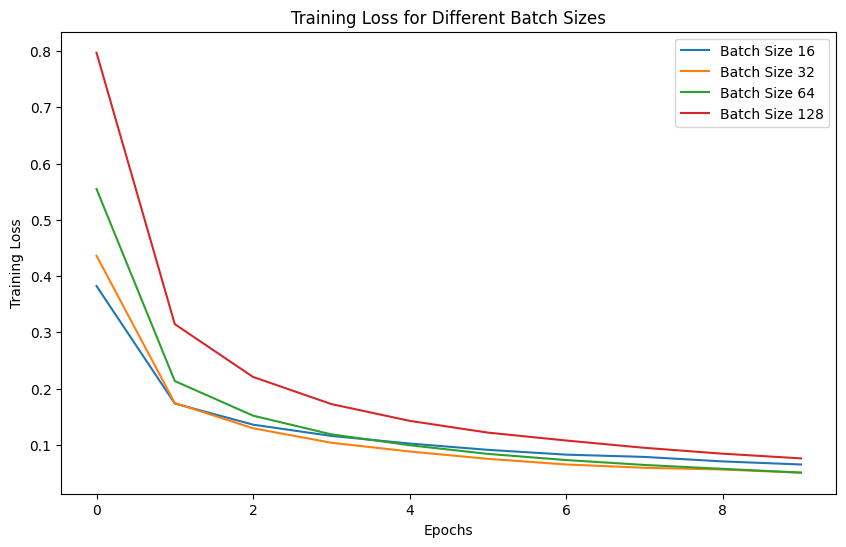

Batch Size: 16 - Final Test Accuracy: 96.91%
Batch Size: 32 - Final Test Accuracy: 96.91%
Batch Size: 64 - Final Test Accuracy: 97.43%
Batch Size: 128 - Final Test Accuracy: 97.26%


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define transformations and load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define model with batch normalization
class SimpleNNWithBatchNorm(nn.Module):
    def __init__(self):
        super(SimpleNNWithBatchNorm, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = torch.relu(self.bn1(self.fc1(x)))
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        return x

# Function to train the model
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    training_loss = []
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        training_loss.append(avg_loss)
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}")
    return training_loss

# Function to evaluate the model
def evaluate_model(model, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Experiment with different batch sizes
batch_sizes = [16, 32, 64, 128]
epochs = 10
results = {}

for batch_size in batch_sizes:
    print(f"\nTraining with batch size {batch_size}")
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    # Initialize the model, loss function, and optimizer
    model_bn = SimpleNNWithBatchNorm()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model_bn.parameters(), lr=0.01)

    # Train the model
    training_loss = train_model(model_bn, train_loader, criterion, optimizer, epochs)

    # Evaluate the model
    test_accuracy = evaluate_model(model_bn, test_loader)
    print(f"Test Accuracy with batch size {batch_size}: {test_accuracy:.2f}%")

    # Store results
    results[batch_size] = {'loss': training_loss, 'accuracy': test_accuracy}

# Plot training loss for different batch sizes
plt.figure(figsize=(10, 6))
for batch_size, result in results.items():
    plt.plot(result['loss'], label=f'Batch Size {batch_size}')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss for Different Batch Sizes')
plt.legend()
plt.show()

# Print summary of results
for batch_size, result in results.items():
    print(f"Batch Size: {batch_size} - Final Test Accuracy: {result['accuracy']:.2f}%")
